<a href="https://colab.research.google.com/github/esther-nyokabi/Moringa-Core-Statistics/blob/main/Independent_Project_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question

# Specifying the Data Analytic Question

Investigating a claim about the blue cars from the provided Autolib dataset.
-  On a given weekday, the number of BlueCars taken is more than the total combined number of Utilib and Utilib_14 cars.  (CLAIM:) - Alternative hypothesis

- On a given weekday, the number of BlueCars taken is not more than the total combined number of Utilib and Utilib_14 cars.Null hypothesis

# Defining the metric of Success

The objective for this data includes investigating the claim whether or not the the average number of blue cars taken is different from that of the blue cars returned

# Understanding the concept

We have been tasked to understand electric car usage. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest.

#  Recording the Experimental Design

To work on this project, we will perform the following

- Finding and dealing with outliers, anomalies, and missing data within the dataset.
- Conducting univariate and bivariate analysis recording our observations.
- Implementing the solution by performing hypothesis testing

# Relevance of the data

The provided dataset is a daily aggregation of the number of events on the Autolib network. The dataset used is relevant for this analysis.

# Data Preparation

###Importing libraries

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [93]:
df = pd.read_csv("autolib_daily_events_postal_code.csv")
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [94]:
# Information regarding the columns within the Dataset
descriptions = pd.read_excel("columns_explanation.xlsx")
descriptions

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


# Exploring the Dataset

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [96]:
# determining the number of records in the dataset
df.shape

(16085, 13)

### Accuracy

In [97]:
# Checking that the columns given are all correct.
# For instance in the Day Of Week column , the values should range from 0-6.
df.dayOfWeek.unique()

array([0, 1, 2, 3, 4, 5, 6])

### Completeness

In [98]:
# checking for null values
df.isna().sum().sum()

0

### Consistency

In [99]:
# checking for duplicates
df.duplicated().any()

False

In [100]:
# Checking for Outliers
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out' 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset without outliers
print(df1.shape)

# Printing the shape of our old dataset with outliers
print(df.shape)

(9783, 13)
(16085, 13)


### Uniformity

In [101]:
df1.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [102]:
# Modifying column names to lower case and placing underscores for consistency
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df1.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

## Univariate Analysis

In [103]:
# Numerical variables
df1[['bluecars_taken_sum','bluecars_returned_sum']].describe()

,bluecars_taken_sum,bluecars_returned_sum
count,9783.000000,9783.000000
mean,49.242870,49.222324
std,46.303795,46.223838
min,0.000000,0.000000
25%,17.000000,17.000000
50%,34.000000,34.000000
75%,67.000000,67.000000
max,293.000000,301.000000


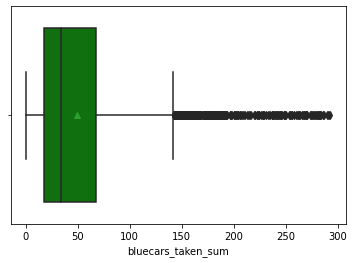

In [104]:
sns.boxplot(df1['bluecars_taken_sum'],color='green', showmeans=True)

Text(0.5, 1.0, 'Blue cars taken')

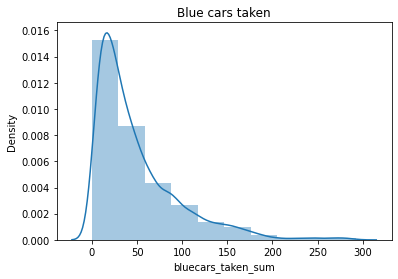

In [105]:
# Plotting bluecars taken
sns.distplot(df1['bluecars_taken_sum'], bins=10)
plt.title('Blue cars taken')

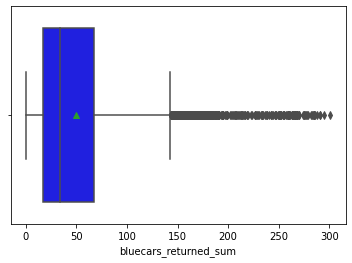

In [106]:
# Box plot for sum of blue cars returned
sns.boxplot(df1['bluecars_returned_sum'], color='blue',showmeans=True)

Text(0.5, 1.0, 'distribution of blue cars returned')

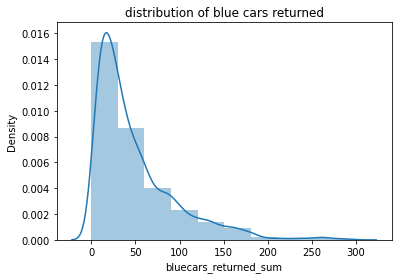

In [107]:
# Plot bluecars returned 
sns.distplot(df1['bluecars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')

In [108]:
df1[['bluecars_taken_sum','bluecars_returned_sum']].skew()

bluecars_taken_sum       1.791195
bluecars_returned_sum    1.797422
dtype: float64

In [109]:
df1[['bluecars_taken_sum','bluecars_returned_sum']].kurt()

bluecars_taken_sum       3.910795
bluecars_returned_sum    3.918840
dtype: float64


- The BlueCars columns were both very highly skewed with the Blue_Cars taken 
having a skewness of 1.791 and the returned having a skew of 1.797

- They both had very heavy tails with a kurtosis value of 3.918 and 3.910 for the Returned and Taken columns respectively.

The outliers in the dataset might have caused these anomalies but that is still subject to further scrutiny.

In [110]:
df1[['utilib_taken_sum','utilib_returned_sum']].describe()

,utilib_taken_sum,utilib_returned_sum
count,9783.000000,9783.000000
mean,1.498518,1.494327
std,1.909304,1.891761
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,10.000000


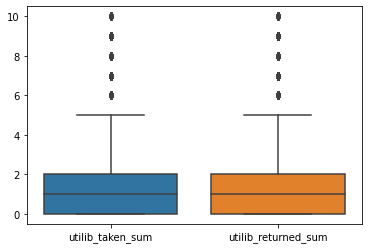

In [111]:
sns.boxplot(data=df1[['utilib_taken_sum','utilib_returned_sum']])


Text(0.5, 1.0, 'Utilib Taken Sum')

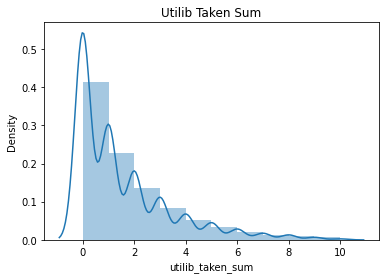

In [112]:
sns.distplot(df1['utilib_taken_sum'], bins=10)
plt.title('Utilib Taken Sum')

Text(0.5, 1.0, 'Utilib Returned Sum')

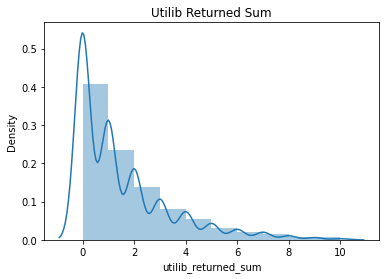

In [113]:
sns.distplot(df1['utilib_returned_sum'], bins=10)
plt.title('Utilib Returned Sum')

In [114]:
df1[['utilib_taken_sum','utilib_returned_sum']].skew()

utilib_taken_sum       1.652089
utilib_returned_sum    1.653366
dtype: float64

In [115]:
df1[['utilib_taken_sum','utilib_returned_sum']].kurt()

utilib_taken_sum       2.685229
utilib_returned_sum    2.726885
dtype: float64

Utilib taken sum and utilib returned sum are both highly skewed having lighter tails with a kurtosis value of 2.7 and skewness of 1.6

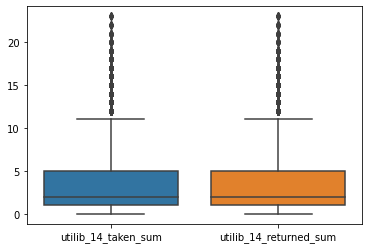

In [116]:
sns.boxplot(data=df1[['utilib_14_taken_sum','utilib_14_returned_sum']])

- The Utilib_14 cars dataset is skewed towards the right, with a large number of entries being below 20.

In [117]:
df1['bluecars_taken_sum'].corr(df1['bluecars_returned_sum'])

0.992041181514075

In [118]:
# Correlation matrix
df1.corr()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,1.000000,0.001195,0.004671,-0.206847,-0.208021,-0.132142,-0.129783,-0.150472,-0.149341,-0.121932,-0.120596
n_daily_data_points,0.001195,1.000000,0.098400,0.003433,0.005715,0.010958,0.010642,0.011844,0.016537,-0.001043,-0.002158
dayofweek,0.004671,0.098400,1.000000,0.110733,0.103159,0.075870,0.077932,0.086363,0.083896,0.020186,0.014675
bluecars_taken_sum,-0.206847,0.003433,0.110733,1.000000,0.992041,0.626960,0.625355,0.751659,0.747126,0.312955,0.310257
bluecars_returned_sum,-0.208021,0.005715,0.103159,0.992041,1.000000,0.629297,0.627041,0.754341,0.750467,0.309676,0.309799
utilib_taken_sum,-0.132142,0.010958,0.075870,0.626960,0.629297,1.000000,0.896131,0.505760,0.497382,0.204125,0.203032
utilib_returned_sum,-0.129783,0.010642,0.077932,0.625355,0.627041,0.896131,1.000000,0.508498,0.500723,0.202881,0.202152
utilib_14_taken_sum,-0.150472,0.011844,0.086363,0.751659,0.754341,0.505760,0.508498,1.000000,0.948078,0.220987,0.219591
utilib_14_returned_sum,-0.149341,0.016537,0.083896,0.747126,0.750467,0.497382,0.500723,0.948078,1.000000,0.216981,0.218259
slots_freed_sum,-0.121932,-0.001043,0.020186,0.312955,0.309676,0.204125,0.202881,0.220987,0.216981,1.000000,0.985033


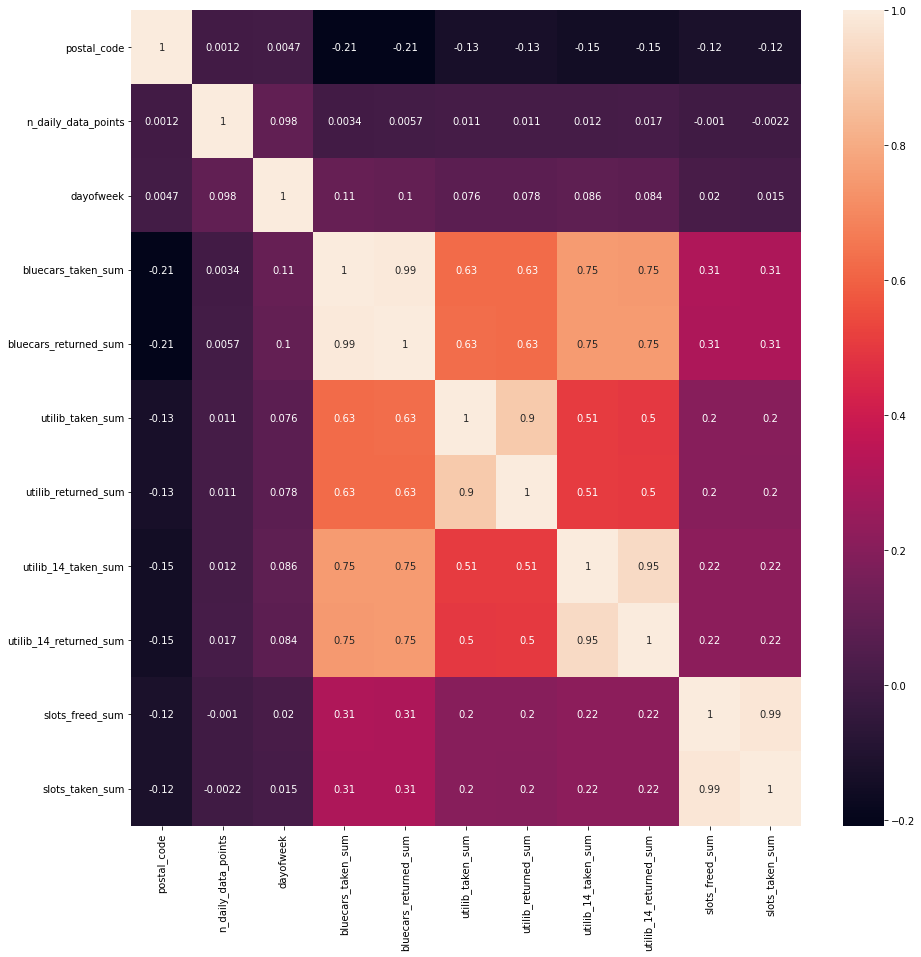

In [119]:
# Correlation Heatmap
plt.subplots(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True)

Summary

There is a strong positive correlation between:

- The BlueCars taken and BlueCar returned Variable
- The Free Charging Slots and the Taken Charging Slots columns.
- The Utilib taken and Utilib returned variable
- The Utilib_14 taken and the Utilib_14 returned

- There is weak inverse relationship with the Postal Code and Charging Slots Taken variable and the Postal Code and Charging Slots Freed Variable. 
 -The Charging Slots columns have a similar inverse relationship with the Daily data Points column.

#Bi-Variate Analysis

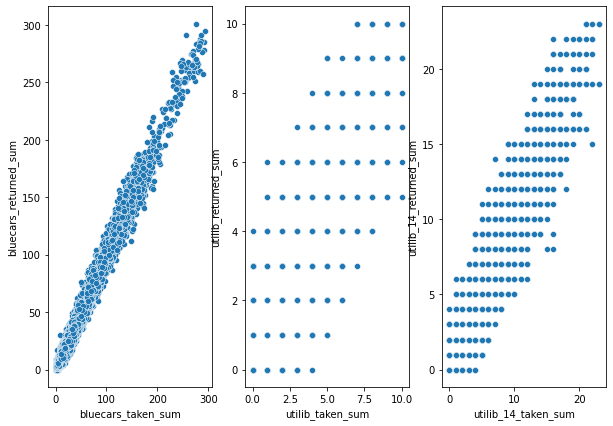

In [121]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10, 7))
fig.suptitle('')
sns.scatterplot(x= df1.bluecars_taken_sum , y= df1.bluecars_returned_sum, ax=ax1)
sns.scatterplot(x= df1.utilib_taken_sum, y= df1.utilib_returned_sum, ax=ax2)
sns.scatterplot(x=df1.utilib_14_taken_sum , y= df1.utilib_14_returned_sum, ax=ax3)

plt.show()

There is a strong correlation within the pairs of the related data

# Hypothesis Testing

# Sampling

-  Total number of Bluecarstaken and Total number of  BlueCars returned



In [122]:
df1['total_vehicles_taken'] =df1['bluecars_taken_sum'] + df1['utilib_taken_sum'] + df1['utilib_14_taken_sum']
df1['total_vehicles_returned'] = df1['bluecars_returned_sum'] + df1['utilib_returned_sum'] + df1['utilib_14_returned_sum']


Total Number of utilib cars taken

In [123]:
df1['total_utilibcars_taken'] =df1['utilib_taken_sum'] + df1['utilib_14_taken_sum']

In [124]:
# Using the random int generator to randomly select one of the days between 0 and 4
random = np.random.randint(0, 4)
random

1

In [125]:
sample = df1[df1['dayofweek']== random]
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1520 entries, 3900 to 16077
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   postal_code              1520 non-null   int64 
 1   date                     1520 non-null   object
 2   n_daily_data_points      1520 non-null   int64 
 3   dayofweek                1520 non-null   int64 
 4   day_type                 1520 non-null   object
 5   bluecars_taken_sum       1520 non-null   int64 
 6   bluecars_returned_sum    1520 non-null   int64 
 7   utilib_taken_sum         1520 non-null   int64 
 8   utilib_returned_sum      1520 non-null   int64 
 9   utilib_14_taken_sum      1520 non-null   int64 
 10  utilib_14_returned_sum   1520 non-null   int64 
 11  slots_freed_sum          1520 non-null   int64 
 12  slots_taken_sum          1520 non-null   int64 
 13  total_vehicles_taken     1520 non-null   int64 
 14  total_vehicles_returned  1520 non-nu

### Testing

- On a given weekday, the number of BlueCars taken is more than the total combined number of Utilib and Utilib_14 cars. The confidence level for this test will be 0.95 hence an alpha value of 0.05.

In [128]:
# Average number of all BluCars taken during the period of our review
Avg_BlueCars = df1['bluecars_taken_sum'].mean()
Avg_UtilibCars = df1['total_utilibcars_taken'].mean()

# Average of a sample of Utilib and Utilib_14 cars taken on a random day
sample_Bluecars_mean=sample['bluecars_taken_sum'].mean()
sample_Utilibcars_mean = df1['total_utilibcars_taken'].mean()

# Standard deviation of all BluCars taken during the period of our review
std_dev_of_BlueCars = df1['bluecars_taken_sum'].std()
std_dev_of_Utilibcars= df1['total_utilibcars_taken'].std()

### Z-Score

In [129]:
Z = (sample_Utilibcars_mean - Avg_BlueCars)/std_dev_of_BlueCars
Z

-0.9540739933613558

### P-Value

In [130]:
P = 1 - stats.norm.cdf(Z)
P

0.8299769053830743

The p value of 0.8299 is greater than the alpha value of 0.05. For this reason, the null hypothesis is accepted, that the number of BlueCars taken is less than or equal to the total combined number of Utilib and Utilib_14 cars.